                                  Task **2**



Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data

**About the DataSet**
We are using the Titanic Dataset here. It contains both numerical and string values.

**The predefined columns are **-

Passenger ID - To identify unique passengers

Survived - If they survived or not

P Class - The class passengers travelled in

pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower

Name - Passenger Name

Sex - Gender of Passenger

Age - Age of passenger

Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

SibSp - Number of siblings or spouse

Parch - Parent or child

Ticket - Ticket number

Fare - Amount paid for the ticket

Cabin - Cabin of residence

Embarked - Point of embarkmen

**Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



Reading the dataset

In [9]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Checking for null/missing values in the dataset

In [ ]:



# Basic info
df.info()

# Check missing values
df.isnull().sum()

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

# Confirm cleaning
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


/tmp/ipython-input-2977506643.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2977506643.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Visualization of the Survival Count

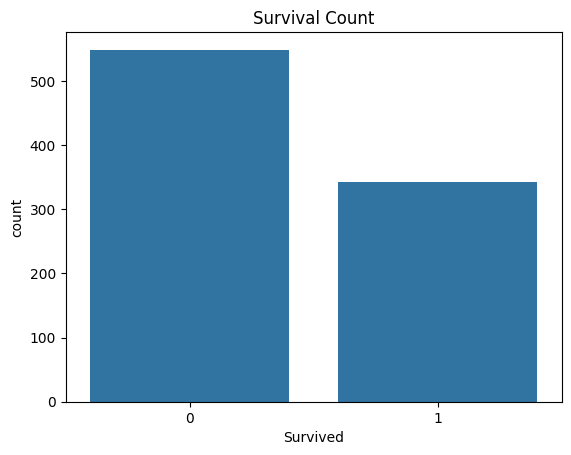

In [ ]:
sns.countplot(data=df, x='Survived')
plt.title("Survival Count")
plt.show()


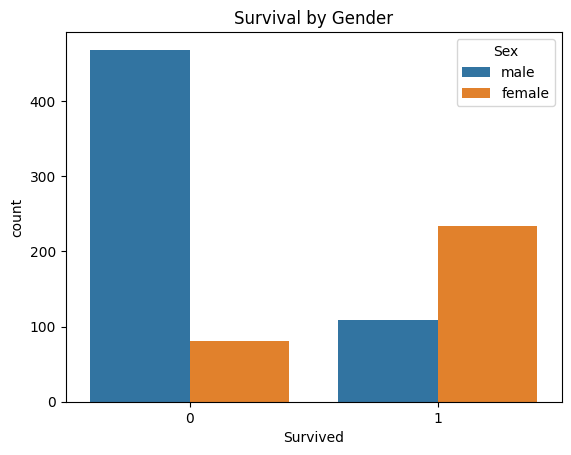

In [ ]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.title("Survival by Gender")
plt.show()


Pie Chart

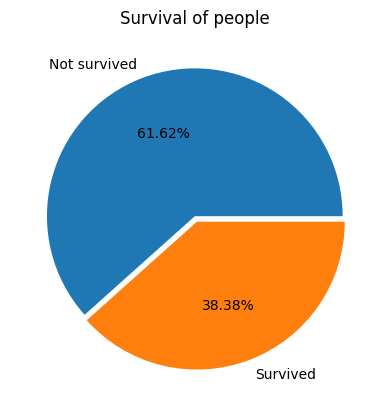

In [13]:
plt.pie(df['Survived'].value_counts(),explode=[0,0.04],autopct="%1.2f%%",labels=['Not survived','Survived'])
plt.title("Survival of people")
plt.show()

In [ ]:
import pandas as pd

Visualization of people survived from different gender

In [14]:
df['Sex'].unique()

array([1, 0])

In [16]:
import numpy as np

gender_array = np.array(['male', 'female'])
print(gender_array)


['male' 'female']


In [18]:
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print(df['Sex'].unique())   # This will output: array(['male', 'female'], dtype=object)


['male' 'female']


/tmp/ipython-input-151870073.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex',data=df,palette='viridis',)


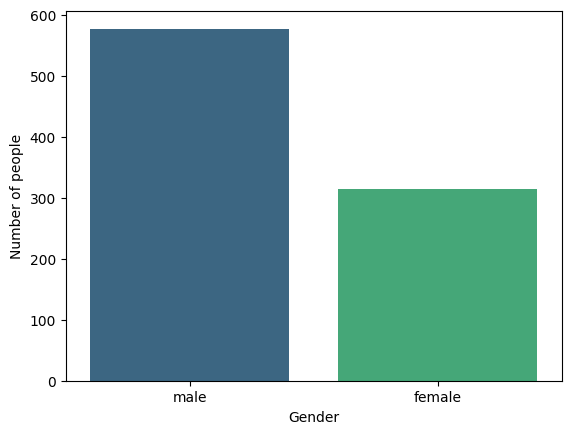

In [19]:
sns.countplot(x='Sex',data=df,palette='viridis',)
plt.xlabel("Gender")
plt.ylabel("Number of people")
plt.show()

Visualization of people survived from different gender

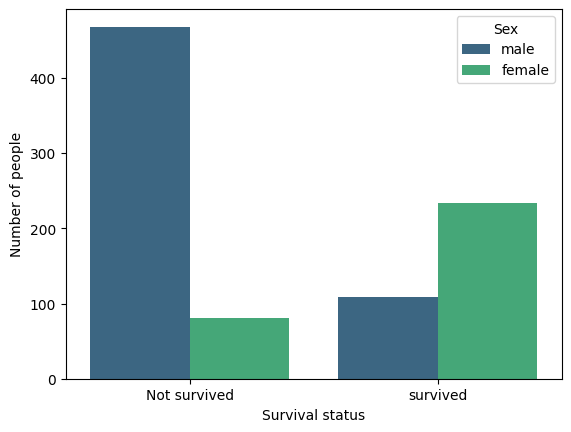

In [20]:
sns.countplot(x='Survived',hue='Sex',data=df,palette='viridis',)
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.show()

/tmp/ipython-input-3251810665.py:10: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")


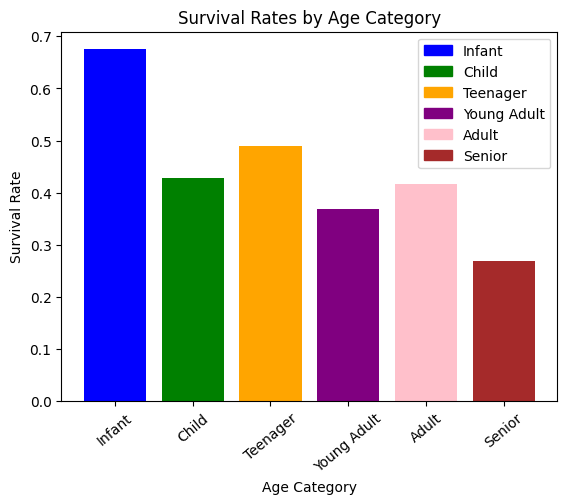

In [10]:
# Define cut points and label names
cut_points = [ 0, 5, 12, 18, 35, 60, 100]
label_names = [ 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

# Create the "Age_categories" column
df['Age_categories'] = pd.cut(df['Age'], bins=cut_points, labels=label_names,
right=False)

# Creating a pivot table for survival rates based on age categories
age_cat_pivot = df.pivot_table(index="Age_categories", values="Survived")

# Define colors for each bar
colors = ['blue', 'green', 'orange', 'purple', 'pink', 'brown']

# Plotting the bar chart with different colors for each bar
fig, ax = plt.subplots()
bars = ax.bar(age_cat_pivot.index, age_cat_pivot['Survived'], color=colors)

# Adding a legend with the specified colors
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in
range(len(colors))]
ax.legend(handles, label_names)
ax.set_title('Survival Rates by Age Category')
ax.set_xlabel('Age Category')
ax.set_ylabel('Survival Rate')
plt.xticks(rotation=40)
plt.show()

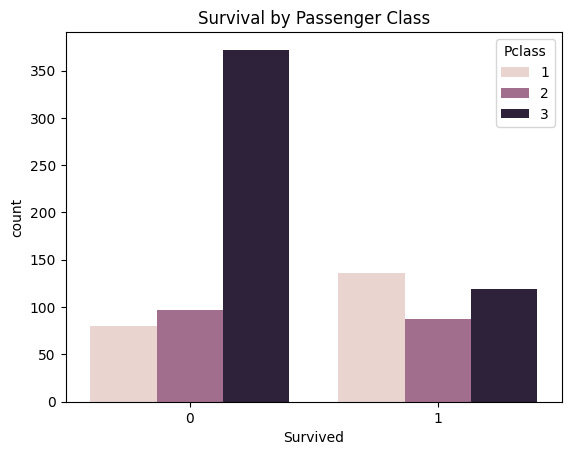

In [ ]:
sns.countplot(data=df, x='Survived', hue='Pclass')
plt.title("Survival by Passenger Class")
plt.show()


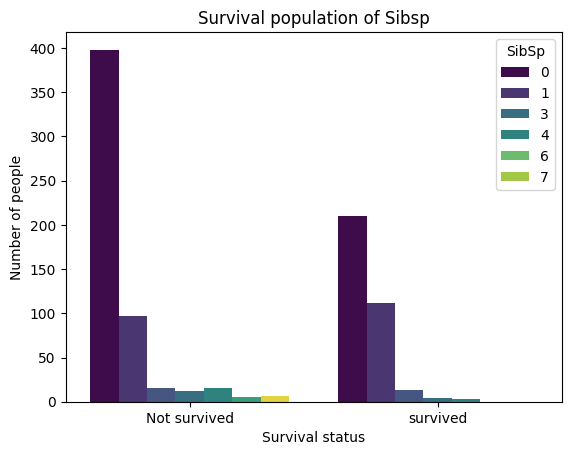

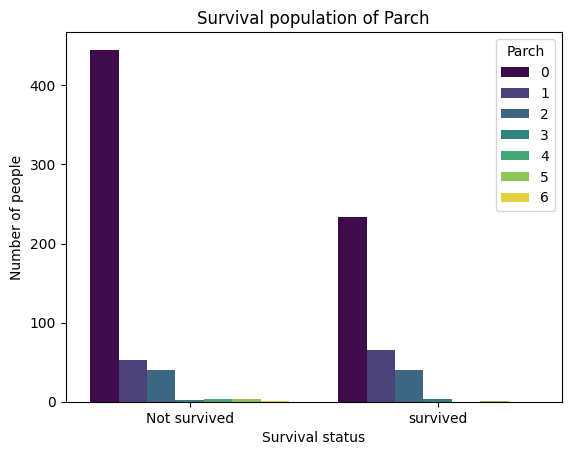

In [21]:
sns.countplot(x ='Survived', hue='SibSp',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.title("Survival population of Sibsp")
plt.show()

sns.countplot(x ='Survived',hue='Parch',data=df,palette='viridis')
plt.xticks(ticks=[0,1],labels=['Not survived','survived'])
plt.title("Survival population of Parch")
plt.xlabel("Survival status")
plt.ylabel("Number of people")
plt.show()

Distribution of Fare and age

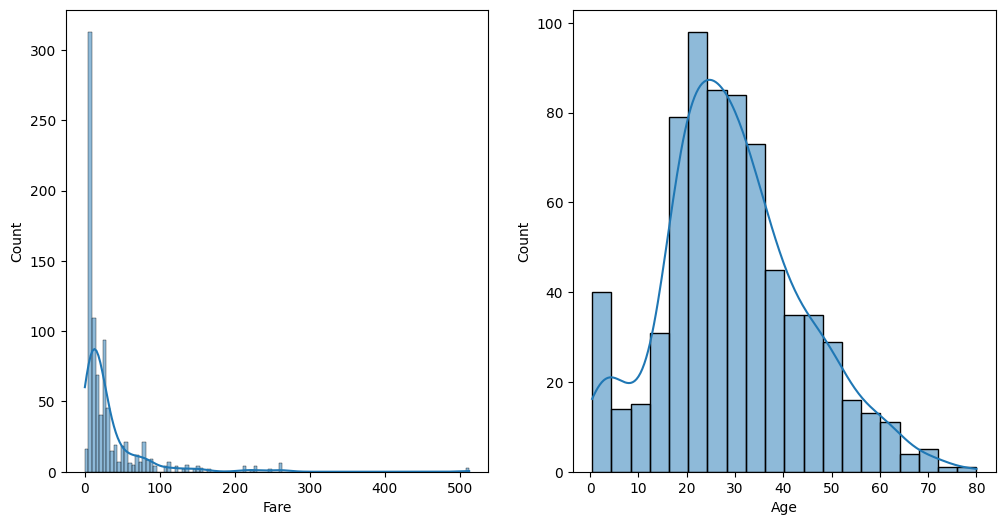

In [22]:
fig,axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df['Fare'], kde=True,ax=axes[0])
sns.histplot(df['Age'].dropna(),kde=True,ax=axes[1])
plt.show()

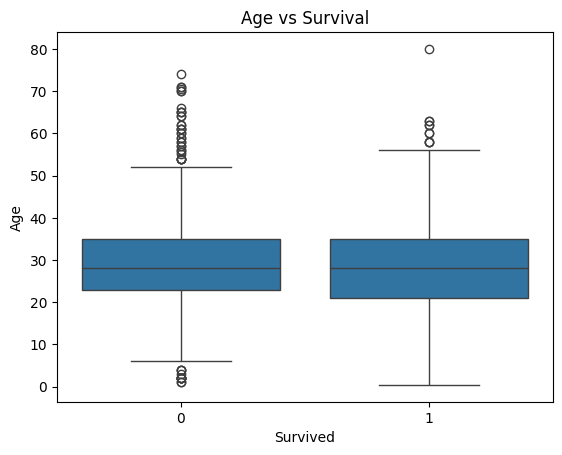

In [ ]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")
plt.show()


hecking for Co-relation

In [11]:
df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


/tmp/ipython-input-3189083419.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Sex':{'male':1,'female':0},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0,Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0,Adult


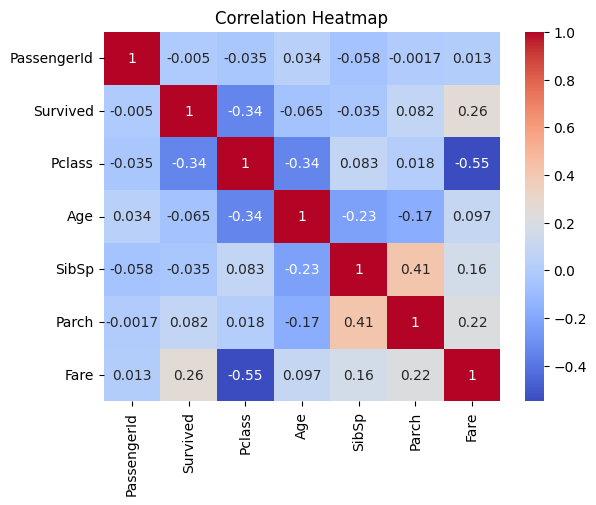

In [ ]:
# Only use numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Observation:

Fare, sex, Pclass, Embarked has correlation with survived column

📌 Insights & Conclusion
🔹 Gender Disparity – Females had a far higher survival rate than males, reflecting the "women and children first" protocol during evacuation.

🔹 Passenger Class Impact – Third-class passengers formed the largest group but had the lowest survival rate, suggesting socio-economic status influenced access to lifeboats and rescue.

🔹 Gender × Class Interaction – Males from third class faced the highest risk, showing a compounded disadvantage of gender and class in survival chances.

🔹 Age Influence – Young adults recorded the lowest survival rate, likely due to priority given to children and women during rescue operations.

🔹 Key Predictors of Survival – Features such as Fare, Sex, Passenger Class, and Embarkation Point showed strong correlation with survival, making them critical factors in outcome prediction.

💡 This analysis reinforces how social norms, economic status, and demographics collectively influenced survival outcomes on the Titanic.